This notebook goes along with the Deep Learning using Keras tutorial on Medium.

- [Keras tutorial: regression](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


### In this model, we are going to predict the hourly wages of employees using regression based on Keras.

In [3]:
#read in training data
wages_df = pd.read_csv('hourly_wages_data.csv')

#view data structure
wages_df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [4]:
#create a dataframe with all training data except the target column
data_X = wages_df.drop(columns=['wage_per_hour'])

#check that the target variable has been removed
data_X.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0


In [5]:
#create a dataframe with only the target column
data_y = wages_df[['wage_per_hour']]

#view dataframe
wages_df[['wage_per_hour']].head(),data_y.head()

(   wage_per_hour
 0           5.10
 1           4.95
 2           6.67
 3           4.00
 4           7.50,    wage_per_hour
 0           5.10
 1           4.95
 2           6.67
 3           4.00
 4           7.50)

### Simple model

In [6]:
#create simple model with light model capacity 
model_s = Sequential()

#get number of columns in training data
n_cols = data_X.shape[1]
print(n_cols)

#add model layers
model_s.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_s.add(Dense(10, activation='relu'))
model_s.add(Dense(1, activation='relu'))

9


In [7]:
model_s.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile model using mse as a measure of model performance
model_s.compile(optimizer='adam', loss='mean_squared_error')

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [9]:
#train model with all data
model_s.fit(data_X, data_y, validation_split=0.25, epochs=30, callbacks=[early_stopping_monitor])

Train on 400 samples, validate on 134 samples
Epoch 1/30
400/400 [==============================] - 0s 325us/step - loss: 93.0294 - val_loss: 151.8699
Epoch 2/30
400/400 [==============================] - 0s 32us/step - loss: 93.0294 - val_loss: 151.8699
Epoch 3/30
400/400 [==============================] - 0s 32us/step - loss: 93.0294 - val_loss: 151.8699
Epoch 4/30
400/400 [==============================] - 0s 32us/step - loss: 93.0294 - val_loss: 151.8699


### Increase model capacity

In [10]:
# training a new model on the same data to show the effect of increasing model capacity
model_b = Sequential()

#get number of columns in training data
n_cols = data_X.shape[1]

#add model layers
model_b.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_b.add(Dense(100, activation='relu'))
model_b.add(Dense(20, activation='relu'))
model_b.add(Dense(1, activation='relu'))

In [11]:
model_b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 24,141
Trainable params: 24,141
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile model using mse as a measure of model performance
model_b.compile(optimizer='adam', loss='mean_squared_error')

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)

In [13]:
#train model
model_b.fit(data_X, data_y, validation_split=0.25, epochs=30, callbacks=[early_stopping_monitor])

Train on 400 samples, validate on 134 samples
Epoch 1/30
400/400 [==============================] - 0s 297us/step - loss: 34.7431 - val_loss: 35.8337
Epoch 2/30
400/400 [==============================] - 0s 45us/step - loss: 21.2125 - val_loss: 30.4940
Epoch 3/30
400/400 [==============================] - 0s 45us/step - loss: 19.6026 - val_loss: 27.8281
Epoch 4/30
400/400 [==============================] - 0s 42us/step - loss: 18.9610 - val_loss: 28.4479
Epoch 5/30
400/400 [==============================] - 0s 42us/step - loss: 19.4883 - val_loss: 29.3852
Epoch 6/30
400/400 [==============================] - 0s 42us/step - loss: 18.9902 - val_loss: 30.2292
Epoch 7/30
400/400 [==============================] - 0s 42us/step - loss: 18.7951 - val_loss: 28.3096
Epoch 8/30
400/400 [==============================] - 0s 42us/step - loss: 20.8905 - val_loss: 30.1161
Epoch 9/30
400/400 [==============================] - 0s 42us/step - loss: 18.1960 - val_loss: 30.2936
Epoch 10/30
400/400 [=====

### Performance of model_s and model_b

> Split dataframe into the train and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 9), (134, 9), (400, 1), (134, 1))

In [18]:
y_test[:5]  # randomly selected!

,wage_per_hour
222,6.4
131,5.5
149,6.0
244,5.5
84,9.0


### small model: model_s1

In [30]:
# create simple model
model_s1 = Sequential()  # simple model

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model_s1.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_s1.add(Dense(10, activation='relu'))
model_s1.add(Dense(1, activation='relu'))

In [20]:
#-----------------------------------------------------------------_______------------
# Define custom loss functions for regression in Keras 
#
# The functions below are Keras backend tensor functions 
# and can be used for Keras loss functions, Keras metrics and Keras learning curves. 
#------------------------------------------------------------------_______-----------
# https://github.com/keras-team/keras/issues/7947

# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))


> [Metrics for Deep Learning with Keras in Python](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/)

> [Regression with Keras in Python](https://github.com/keras-team/keras/issues/7947)

In [31]:
# compile model using accuracy to measure model performance
model_s1.compile(optimizer='adam', loss=rmse, metrics=[r_square, rmse])
# model_s1.compile(optimizer='adam', loss='mean_squared_error', metrics=["r_square"]))

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
# 

In [32]:
# train model
hist = model_s1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])  # validation_split=0.2

Train on 400 samples, validate on 134 samples
Epoch 1/30
400/400 [==============================] - 0s 407us/step - loss: 5.9996 - r_square: -1.4462 - rmse: 5.9996 - val_loss: 4.9772 - val_r_square: -0.8413 - val_rmse: 4.9772
Epoch 2/30
400/400 [==============================] - 0s 40us/step - loss: 4.3595 - r_square: -0.5389 - rmse: 4.3595 - val_loss: 4.3765 - val_r_square: -0.4098 - val_rmse: 4.3765
Epoch 3/30
400/400 [==============================] - 0s 37us/step - loss: 3.9031 - r_square: -0.2139 - rmse: 3.9031 - val_loss: 4.2961 - val_r_square: -0.3948 - val_rmse: 4.2961
Epoch 4/30
400/400 [==============================] - 0s 37us/step - loss: 3.8750 - r_square: -0.2320 - rmse: 3.8750 - val_loss: 4.2816 - val_r_square: -0.3927 - val_rmse: 4.2816
Epoch 5/30
400/400 [==============================] - 0s 40us/step - loss: 3.8516 - r_square: -0.1859 - rmse: 3.8516 - val_loss: 4.2578 - val_r_square: -0.3676 - val_rmse: 4.2578
Epoch 6/30
400/400 [==============================] - 0s 3

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

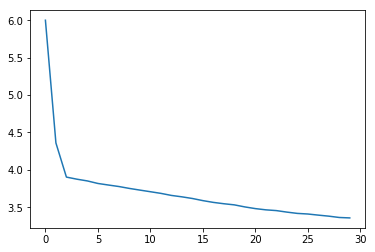

In [34]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

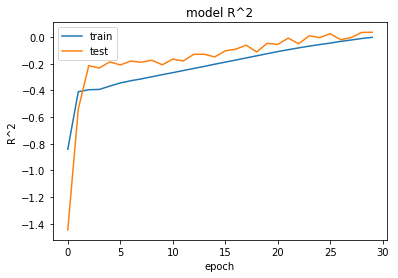

In [35]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(hist.history['val_r_square'])
plt.plot(hist.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

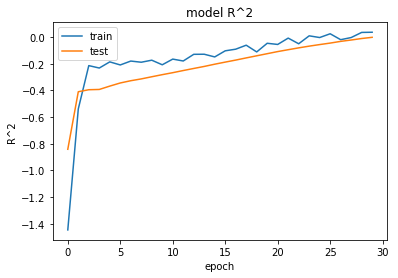

In [36]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(hist.history['r_square'])
plt.plot(hist.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

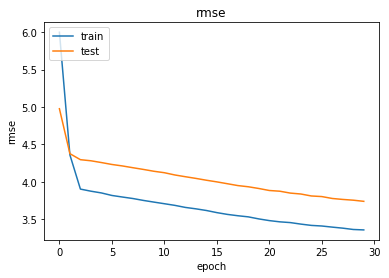

In [37]:
# plot training curve for rmse
plt.plot(hist.history['rmse'])
plt.plot(hist.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
# get predictions
y_pred = model_s1.predict(X_test)
y_pred[:5]

array([[11.605385 ],
       [ 5.7754498],
       [ 6.66088  ],
       [ 8.035663 ],
       [ 6.9929256]], dtype=float32)

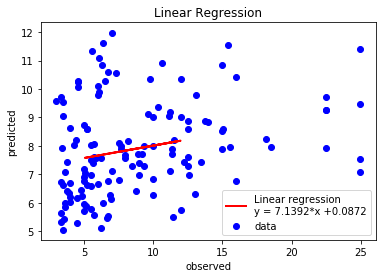

In [39]:
# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
true_y=y_test  # np.argmax(y_test, axis=1)  # decode one-hot encoding
regressor.fit(true_y, y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(true_y, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

### Big model: model_b1

In [68]:
#create model with larger capacity
model_b1 = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model_b1.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_b1.add(Dense(100, activation='relu'))
model_b1.add(Dense(20, activation='relu'))
model_b1.add(Dense(1, activation='relu'))

In [69]:
# compile model using accuracy to measure model performance
model_b1.compile(optimizer='adam', loss=rmse, metrics=[r_square, rmse])
# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)

In [70]:
# train model
hist = model_b1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])  # validation_split=0.2

Train on 400 samples, validate on 134 samples
Epoch 1/30
400/400 [==============================] - 0s 897us/step - loss: 4.0891 - r_square: -0.3185 - rmse: 4.0891 - val_loss: 3.8409 - val_r_square: -0.1565 - val_rmse: 3.8409
Epoch 2/30
400/400 [==============================] - 0s 52us/step - loss: 3.4396 - r_square: -0.0672 - rmse: 3.4396 - val_loss: 3.8084 - val_r_square: 0.0131 - val_rmse: 3.8084
Epoch 3/30
400/400 [==============================] - 0s 52us/step - loss: 3.3317 - r_square: 0.0722 - rmse: 3.3317 - val_loss: 3.5565 - val_r_square: 0.0353 - val_rmse: 3.5565
Epoch 4/30
400/400 [==============================] - 0s 52us/step - loss: 3.2798 - r_square: 0.1300 - rmse: 3.2798 - val_loss: 3.5476 - val_r_square: 0.1228 - val_rmse: 3.5476
Epoch 5/30
400/400 [==============================] - 0s 52us/step - loss: 3.2428 - r_square: 0.1182 - rmse: 3.2428 - val_loss: 3.5330 - val_r_square: 0.1396 - val_rmse: 3.5330
Epoch 6/30
400/400 [==============================] - 0s 52us/ste

***

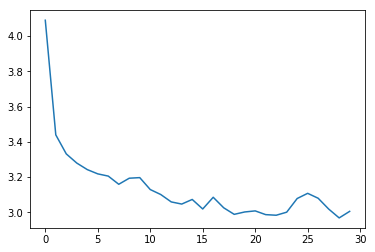

In [71]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

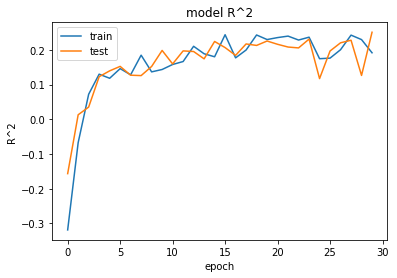

In [72]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(hist.history['r_square'])
plt.plot(hist.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

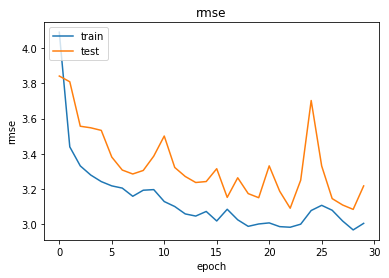

In [73]:
# plot training curve for rmse
plt.plot(hist.history['rmse'])
plt.plot(hist.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [74]:
# get predictions
y_pred = model_b1.predict(X_test)
y_pred[:5]

array([[ 8.39978  ],
       [ 7.2420254],
       [ 9.028973 ],
       [ 9.142657 ],
       [10.685832 ]], dtype=float32)

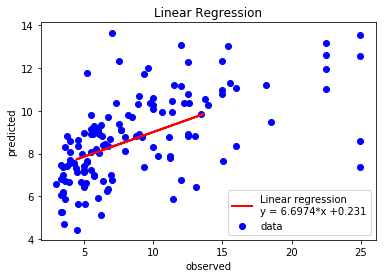

In [75]:
# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
true_y=y_test # np.argmax(y_test, axis=1)  # decode one-hot encoding
regressor.fit(true_y, y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(true_y, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [76]:
true_y[:5]

,wage_per_hour
222,6.4
131,5.5
149,6.0
244,5.5
84,9.0


In [77]:
true_y[:5],y_test[:5]

(     wage_per_hour
 222            6.4
 131            5.5
 149            6.0
 244            5.5
 84             9.0,      wage_per_hour
 222            6.4
 131            5.5
 149            6.0
 244            5.5
 84             9.0)

### The validation loss becomes smaller with the increase of model capcity.

[Meaning of accuracy of regression in keras](https://github.com/keras-team/keras/issues/7947)